<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos. 
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [65]:
#importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#importar artists
artist = pd.read_table('data/artists.dat')
artist = artist[['id', 'name']]
artist.columns = ['userID', 'userName']
artist.head()

,userID,userName
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


In [12]:
#importar user_artists
user_artist = pd.read_table('data/user_artists.dat')
user_artist.columns = ['userID', 'artistID', 'nro_reproducciones']
user_artist.head()

,userID,artistID,nro_reproducciones
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [13]:
#unir tablas
merged_df = pd.merge(artist, user_artist)
merged_df.head()

,userID,userName,artistID,nro_reproducciones
0,2,Diary of Dreams,51,13883
1,2,Diary of Dreams,52,11690
2,2,Diary of Dreams,53,11351
3,2,Diary of Dreams,54,10300
4,2,Diary of Dreams,55,8983


In [21]:
merged_df.shape

(92269, 4)

**Procedimiento:**
1. Importar las librerías `pandas` y `numpy`
2. En el dataframe `artist` se lee la data de artists, seleccionando las columnas `id` y `name`.
3. Se renombran las columnas seleccionadas de `artist` como `userID` y `userName`.
4. En el dataframe `user_artist` se lee la data de user_artists, seleccionando las columnas `userID`, `artistID` y `weight`.
5. Se renombra la columna `weight` como `nro_reproducciones` del dataframe `user_artist`.
6. Se usa la función de pandas `merge` para unir los dataframes creados anteriormente para obtener así el dataframe `merged_df`.

**Análisis y Conclusiones:**
* Se consolida el dataframe `merged_df` con un total de cuatro (4) columnas y 92269 filas.

### 2. Análisis preliminar. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?


In [20]:
merged_df[['userID', 'artistID']].nunique()

userID       1880
artistID    17568
dtype: int64

**Procedimiento:**
1. Aplicar un filtro a `merged_df` de las columnas `userID` y `artistID`.
2. Usar `nunique` para determinar los valores únicos de las columnas seleccionadas.

**Análisis y Conclusiones:**
* Se encuentran 1880 usuarios únicos y 17568 artistas únicos.


#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [58]:
# Cálculo sin ponderar
resumen_artistas = merged_df.groupby('artistID')['nro_reproducciones'].agg(['sum', 'mean', 'count']).reset_index()
resumen_artistas['Prob_sin_ponderar'] = resumen_artistas['sum'] / resumen_artistas['sum'].sum()
resumen_artistas = resumen_artistas.sort_values(by='Prob_sin_ponderar', ascending=False)
resumen_artistas.head()

,artistID,sum,mean,count,Prob_sin_ponderar
283,289,2392326,4609.491329,519,0.034826
66,72,1301193,4630.580071,281,0.018942
83,89,1288851,2126.816832,606,0.018762
286,292,1057943,2612.204938,405,0.015401
61,67,918568,2151.213115,427,0.013372


In [64]:
# Cálculo ponderado
resumen_artistas['Prob_count'] = resumen_artistas['count'] / resumen_artistas['count'].sum()
resumen_artistas['Ponderado'] = resumen_artistas['sum'] * resumen_artistas['Prob_count']
resumen_artistas['Prob_ponderado'] = resumen_artistas['Ponderado'] / resumen_artistas['Ponderado'].sum()
resumen_artistas = resumen_artistas.sort_values(by='Prob_ponderado', ascending=False)
resumen_artistas.head()

,artistID,sum,mean,count,Prob_sin_ponderar,Prob_ponderado,Prob_count,Ponderado
283,289,2392326,4609.491329,519,0.034826,0.121028,0.005625,13456.493449
83,89,1288851,2126.816832,606,0.018762,0.076133,0.006568,8464.855000
282,288,902032,1879.233333,480,0.013131,0.042205,0.005202,4692.533354
286,292,1057943,2612.204938,405,0.015401,0.041765,0.004389,4643.671385
61,67,918568,2151.213115,427,0.013372,0.038233,0.004628,4250.924319


**Procedimiento:**
1. Usar un `groupby` para agrupar `nro_reproducciones` por la suma, media y recuento.
2. Calcular el promedio de la suma de reproducciones por artista, y su respectivo porcentaje de participación.
3. Ordenar esa participación de mayor a menor.
4. Calcular el peso del recuento de usuarios que escuchan cada artista sobre la suma del recuento.
5. Calcular el ponderado, el cual es la suma de reproducciones multiplicado por el peso calculado en el paso anterior, por cada artista.
6. Sobre el ponderado, obtener la participación y ordenar de mayor a menor.

**Análisis y Conclusiones:**
* Para el análisis de promedio sin ponderar y promedio ponderado se puede observar que un artista como el 289 se ubica en el primer lugar para ambos escenarios. Artistas como los 89, 292 y 67 se mantienen en los primeros puestos para ambos escenarios, pero un artista como el 72, aunque cuenta con 1.3 millones de reproducciones, no se muestra en el segundo escenario (promedio ponderado) dado que el peso del número de usuarios que lo escuchan implica que su ponderado sea castigado y no se muestre entre los cinco (5) primeros.

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


C:\Users\JD_01\AppData\Local\Temp\ipykernel_17068\2495445787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario_8['Reproducciones_relativas'] = usuario_8['nro_reproducciones'] / usuario_8['nro_reproducciones'].sum()


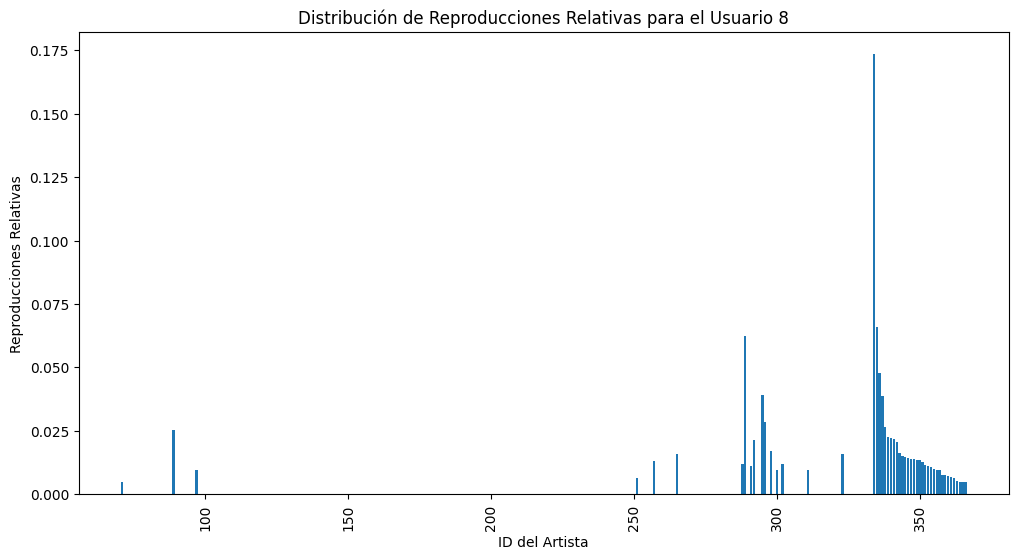

In [77]:
usuario_8 = merged_df[merged_df['userID'] == 8]

usuario_8['Reproducciones_relativas'] = usuario_8['nro_reproducciones'] / usuario_8['nro_reproducciones'].sum()

plt.figure(figsize=(12, 6))
plt.bar(usuario_8['artistID'], usuario_8['Reproducciones_relativas'])
plt.xlabel('ID del Artista')
plt.ylabel('Reproducciones Relativas')
plt.title('Distribución de Reproducciones Relativas para el Usuario 8')
plt.xticks(rotation=90)
plt.show()

In [79]:
usuario_8 = usuario_8.sort_values(by='Reproducciones_relativas', ascending=False)
usuario_8.head(11)

,userID,userName,artistID,nro_reproducciones,Reproducciones_relativas
317,8,DIR EN GREY,334,6291,0.173406
318,8,DIR EN GREY,335,2396,0.066044
307,8,DIR EN GREY,289,2258,0.062240
319,8,DIR EN GREY,336,1735,0.047824
310,8,DIR EN GREY,295,1425,0.039279
320,8,DIR EN GREY,337,1407,0.038783
311,8,DIR EN GREY,296,1039,0.028639
321,8,DIR EN GREY,338,963,0.026544
301,8,DIR EN GREY,89,921,0.025387
322,8,DIR EN GREY,339,819,0.022575


**Procedimiento:**
1. Crear un dataframe para filtrar las reproducciones del usuario 8.
2. Crear la columna `Reproducciones_relativas` la cual se calcula como las reproducciones por artista dividido el total de reproducciones del usuario 8.
3. Graficar las reproducciones relativas con matplotlib.
4. Ordenar el dataframe del usuario 8 por Reproducciones relativas y obtener el top 11.

**Análisis y Conclusiones:**
* De acuerdo a la gráfica se puede observar que hay un grupo condensado entre los artistas 334 hasta 340 con niveles de reproducción altos. Entre el top 10 también se encuentran los artistas 289, 295 y 296.

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [ ]:
# Utilice este espacio para escribir el código.

**Procedimiento:**

**Análisis y Conclusiones:**

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


In [ ]:
# Utilice este espacio para escribir el código.

**Procedimiento:**

**Análisis y Conclusiones:**

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [ ]:
# Utilice este espacio para escribir el código.

**Procedimiento:**

**Análisis y Conclusiones:**

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [ ]:
# Utilice este espacio para escribir el código.

**Procedimiento:**

**Análisis y Conclusiones:**

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hier-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.

**Procedimiento:**

**Análisis y Conclusiones:**

### 4. Recomendaciones generales 

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

**Procedimiento:**

**Análisis y Conclusiones:**